In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import warnings

warnings.filterwarnings("ignore")
sns.set_context('notebook') 
sns.set_style('ticks')

In [2]:
# Read data
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [3]:
train.head(3)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6


In [4]:
test.head(3)

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00


In [5]:
train_original = train.copy()
test_original = test.copy()

In [6]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [7]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

In [8]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [9]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5112 non-null   int64 
 1   Datetime  5112 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


(None, None)

In [10]:
# change datetime format
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')

In [11]:
# for i in (train, test, test_original, train_original):
#     i['year'] = i.Datetime.dt.year
#     i['month'] = i.Datetime.dt.month
#     i['Hour'] = i.Datetime.dt.Hour
#     i['Hour'] = i.Datetime.dt.hour

for i in (train, test, test_original, train_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['hour'] = i.Datetime.dt.hour  # Use 'hour' (all lowercase)
    i['day'] = i.Datetime.dt.day

In [12]:
train.head()

,ID,Datetime,Count,year,month,hour,day
0,0,2012-08-25 00:00:00,8,2012,8,0,25
1,1,2012-08-25 01:00:00,2,2012,8,1,25
2,2,2012-08-25 02:00:00,6,2012,8,2,25
3,3,2012-08-25 03:00:00,2,2012,8,3,25
4,4,2012-08-25 04:00:00,2,2012,8,4,25


In [13]:
test.head(3)

,ID,Datetime,year,month,hour,day
0,18288,2014-09-26 00:00:00,2014,9,0,26
1,18289,2014-09-26 01:00:00,2014,9,1,26
2,18290,2014-09-26 02:00:00,2014,9,2,26


In [14]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

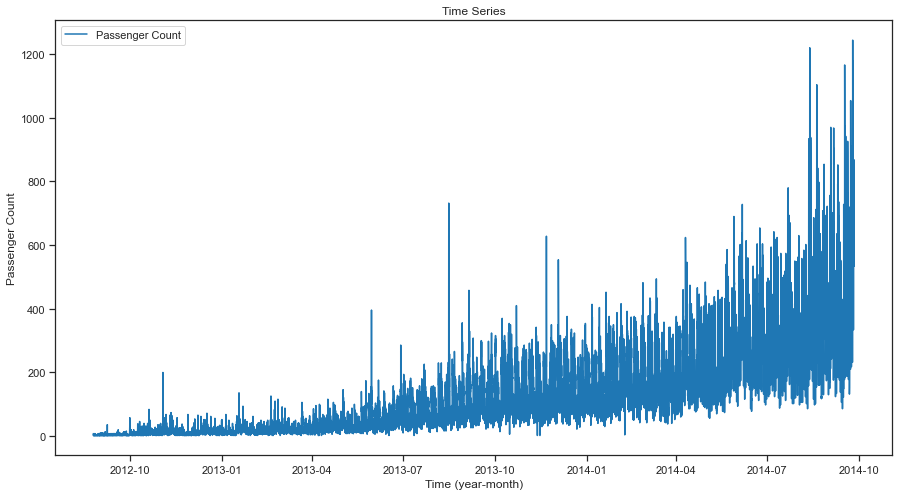

In [15]:
train.index = train['Datetime'] # indexing the time to get the time period on the x axis
df=train.drop('ID',1) # drop ID variable to get only the datetime on x axis
ts = df['Count']

plt.figure(figsize=(15,8))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time (year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')

Increasing tred in the series above. Number of count increase with respect to time. At certain points, a sudden increase in the number of counts

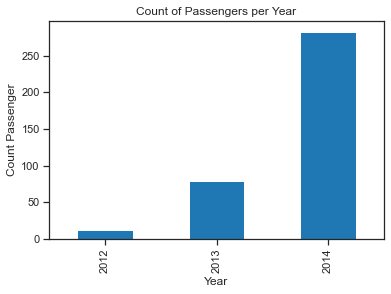

In [16]:
# train.groupby('year')['Count'].mean().plot.bar()
train.groupby('year')['Count'].mean().plot.bar()
plt.xlabel('Year')  # Adding x-axis label
plt.ylabel('Count Passenger')  # Adding y-axis label
plt.title('Count of Passengers per Year')  # Adding a title for better context
plt.show()

first hypothesis is the traffic will increase as the years pass by. look at the passenger count

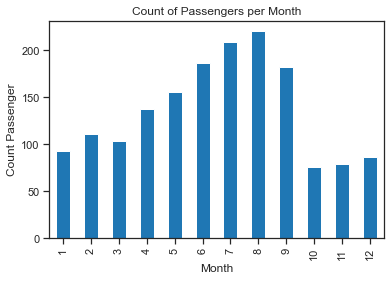

In [17]:
train.groupby('month')['Count'].mean().plot.bar()

plt.xlabel('Month')
plt.ylabel('Count Passenger')
plt.title('Count of Passengers per Month')
plt.show()

2nd hypothesis was about the increase in traffic from may to October.

<AxesSubplot:title={'center':'Passenger Count (Monthwise)'}, xlabel='year,month'>

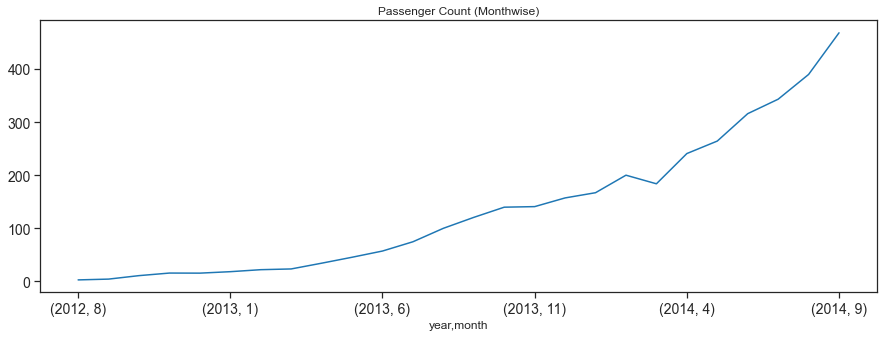

In [18]:
temp=train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count (Monthwise)', fontsize=14)


- months for 1o,11,12 are not present in 2014 and the mean for these months in year 2012 is very less
- since there is an increase trend in our time series, the mean value for the rest of the months will be more bcuz of their larger passenger counts in the year 2014 and will get smaller for these 3 months
- in the above plot we can see an increasing trend in monthly passenger counbt and the growth is approxiamtely exponential

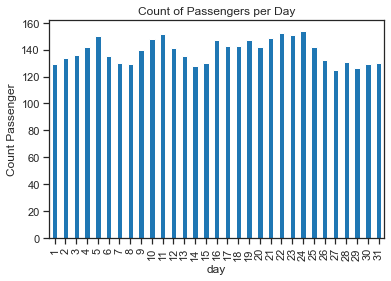

In [19]:
train.groupby('day')['Count'].mean().plot.bar()

plt.xlabel('day')
plt.ylabel('Count Passenger')
plt.title('Count of Passengers per Day')
plt.show()

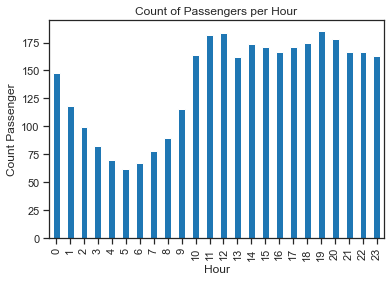

In [20]:
train.groupby('hour')['Count'].mean().plot.bar()

plt.xlabel('Hour')
plt.ylabel('Count Passenger')
plt.title('Count of Passengers per Hour')
plt.show()

- it can be deffered that the peak traffic is at 7PM and then we can see a decreasing trend till 5AM
- After the passenger counts starts to increasing again and peaks again between 11AM and 12 noon

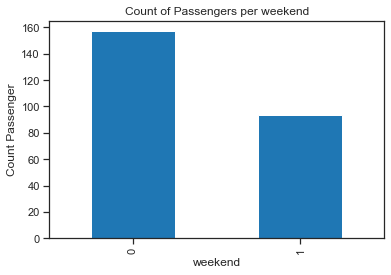

In [21]:
train.groupby('weekend')['Count'].mean().plot.bar()

plt.xlabel('weekend')
plt.ylabel('Count Passenger')
plt.title('Count of Passengers per weekend')
plt.show()

In [22]:
# train.groupby('day of week')['Count'].mean().plot.bar()
# train.groupby('day of week')['Count'].mean().plot.bar()


In [23]:
train=train.drop('ID',1) # drop ID column

In [24]:
# aggregate the hourly time series to daily, weekly and monthly time series to reduce the noise and make it more stable - model easier to learn

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp


hourly = train.resample('H').mean() # Hourly time series
daily = train.resample('D').mean() # Converting to daily mean
weekly = train.resample('W').mean() # Converting to weekly mean
monthly = train.resample('M').mean() # Converting to monthly mean

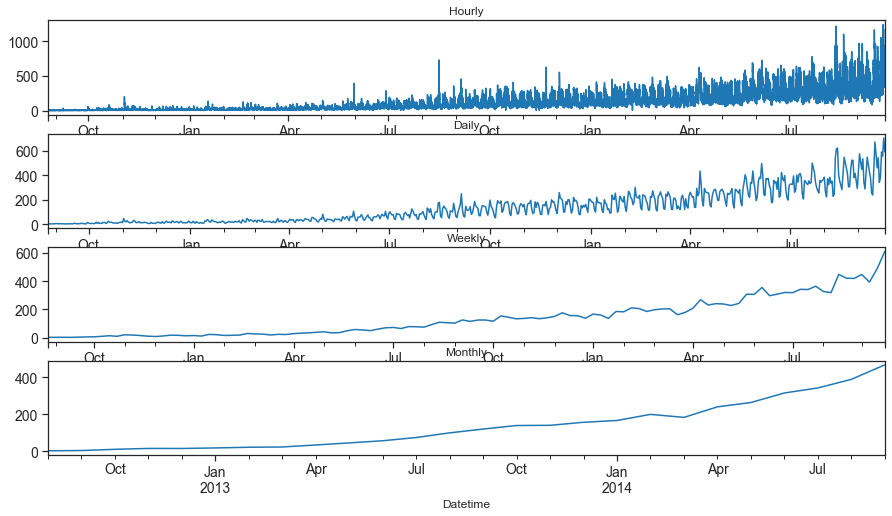

In [25]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs [2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])
plt.show()

![alt text](image.png)

In [26]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M' )
test.index = test.Timestamp

# Converting to daily mean
test = test.resample ('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M' )
train.index = train.Timestamp

# Converting to daily mean
train = train.resample ('D').mean()

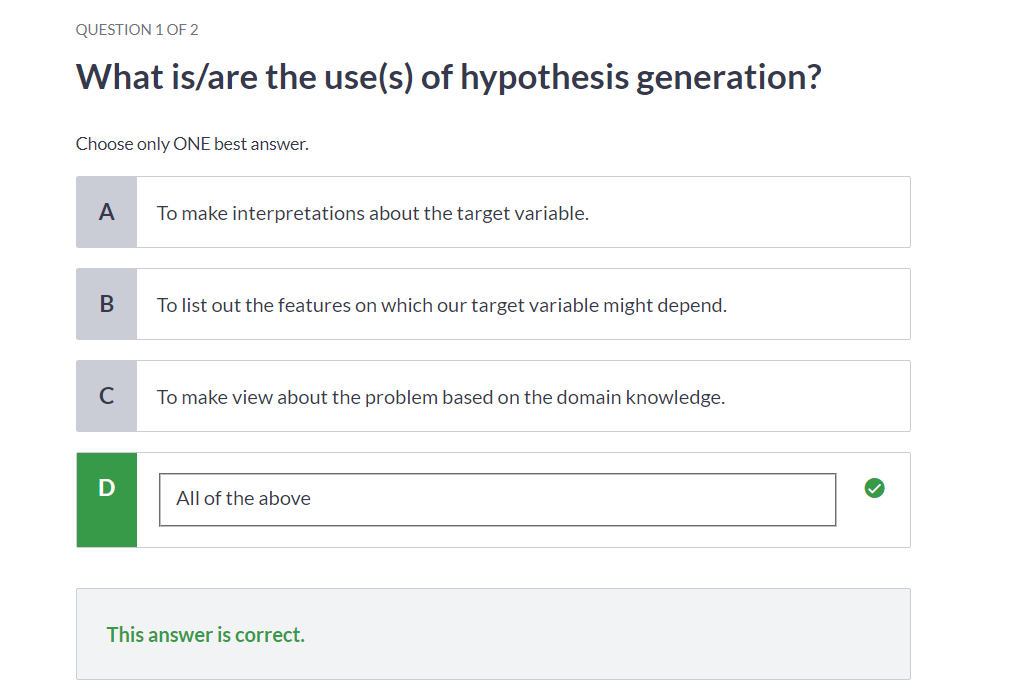

## Splitting data into training and validation part

In [27]:
Train = train['2012-08-25':'2014-06-24']
valid = train['2014-06-25':'2014-09-25']

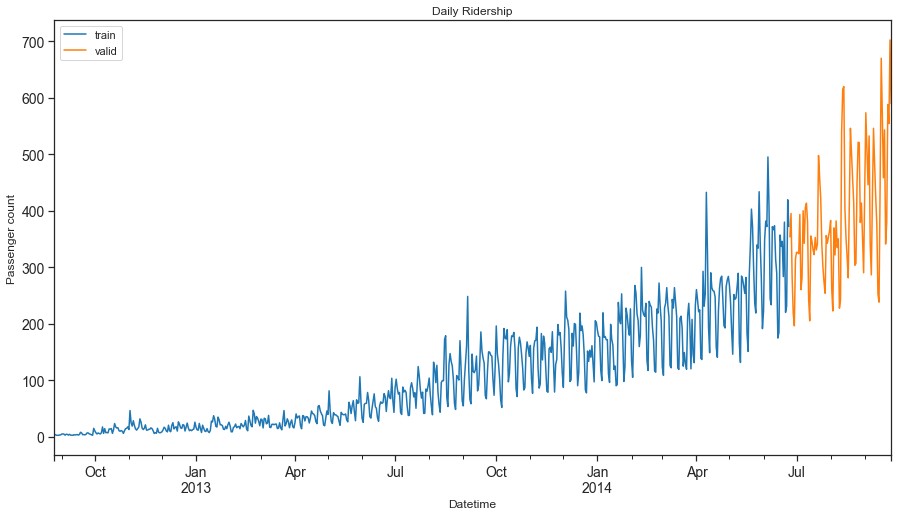

In [28]:
Train.Count.plot(figsize=(15,8),
                 title= 'Daily Ridership',
                 fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8),
                 title= 'Daily Ridership', 
                 fontsize=14, label='valid')

plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend (loc='best')
plt.show()

- blue is train data,orange is validation data
- we will predict the traffic for the validation part and then visualize how accurate our predictions are
- finally we will make our predictions for the testn dataset

## Naive Approach
- we assume that the next expected points is qeaual to the last observed point. 
- so we expect a straight horizontal line as the prediction

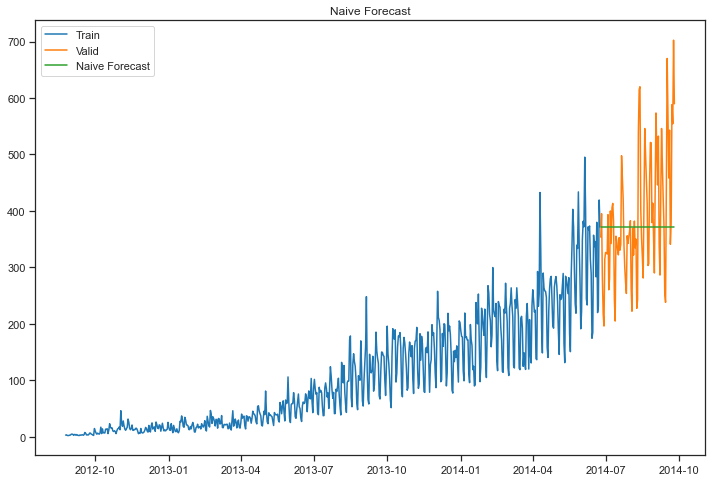

In [29]:
dd= np.asarray (Train. Count)
y_hat = valid.copy()
y_hat['naive'] = dd [len (dd)-1]

plt.figure(figsize=(12,8))
plt.plot(Train. index, Train ['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='Valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend (loc='best')
plt.title("Naive Forecast")
plt.show()


- We can calculate how accurate our predictions are using rmse(Root Mean Square Error)
- rmse is the standard deviation of the residuals.
- Residuals are a measure of how far from the regression line data points are.

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt (mean_squared_error(valid.Count, y_hat.naive))
print(f'The score for RMSE is {rms}')

The score for RMSE is 111.79050467496724


- we can infer that this method is not suitable for the datasets with high variability
- can reduce the rmse value by adopting a different techniques

## Moving Average (Rolling mean)

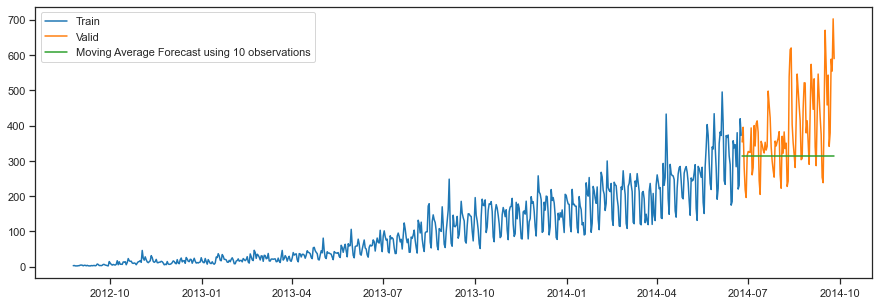

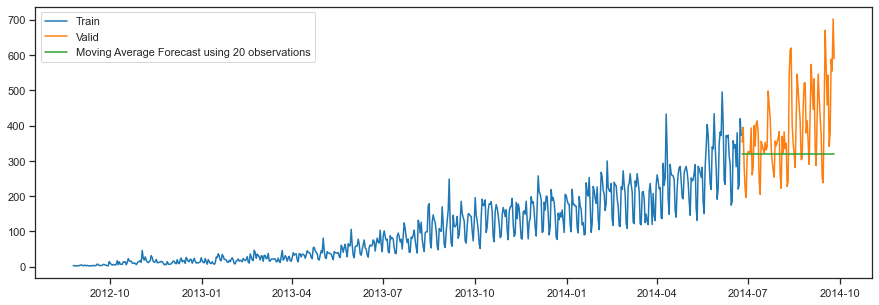

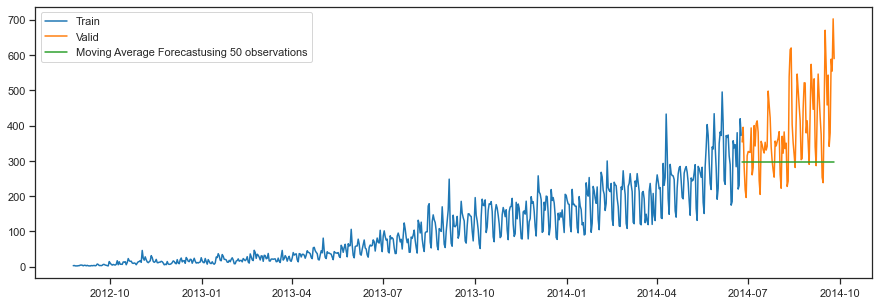

In [31]:
# lets try the rolling mean for the last 10,20,50 days
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.

plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling (20).mean().iloc[-1] # average of last 20 observations.

plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend (loc='best')
plt.show()


y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling (50).mean().iloc[-1] # average of last 50 observations.

plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecastusing 50 observations')
plt.legend (loc='best')
plt.show()

- predictions getting weaker as we increase the number of observations (10,20,50)
- observe the green straight horizontal line, its dropping

In [32]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(f'The score for RMSE is {rms}')

The score for RMSE is 144.19175679986793


## Simple Exponential Smoothing
- assign larger weights to more recent observations than to observations from the distant past
- the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations

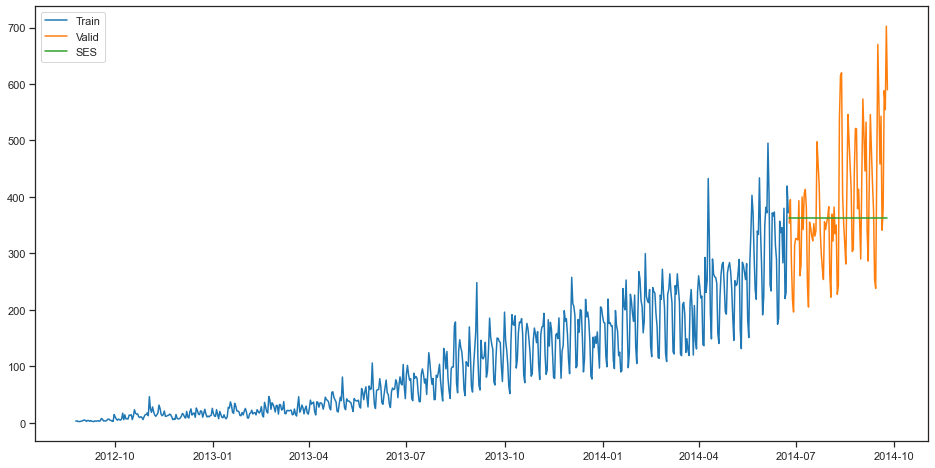

In [33]:

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing (np.asarray (Train [ 'Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid ['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend (loc='best')
plt.show()

In [34]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(f'The score for RMSE is {rms}')

The score for RMSE is 113.43708111884514


## Holt's Linear Trend Model
- an extension of simple exponential smoothing to allow forecasting of data with a trend.
- take into account the trend of the dataset.the forecast function in this method is a function of level and trend

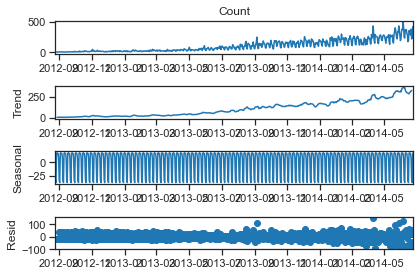

<Figure size 1152x576 with 0 Axes>

In [35]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)

plt.figure(figsize=(16,8))
plt.show()

- an increasing trend can be seen in the dataset from the figure above, so now we will make a model based on the trend

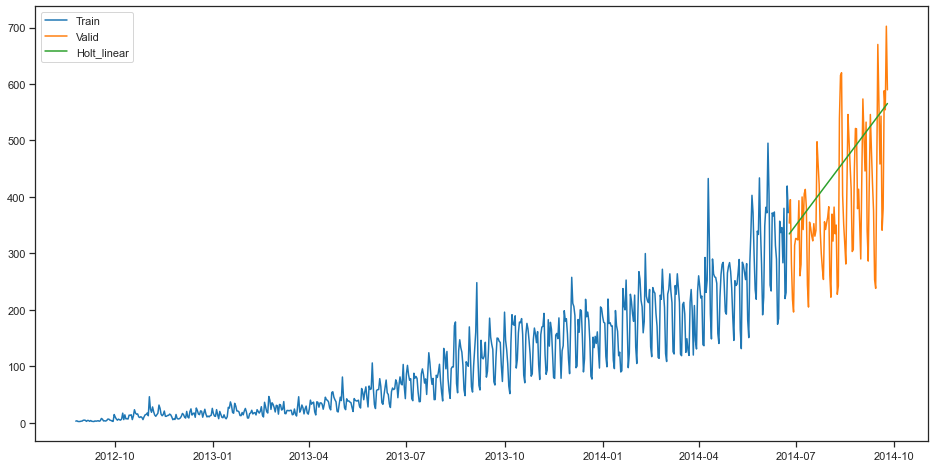

In [36]:

y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1. forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid ['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend (loc='best')
plt.show()

- we can see an inclined line here as the model has taken into consideration the trend of the time series

In [37]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(f'The score for RMSE is {rms}')

The score for RMSE is 112.94278345314041


- it can be deferred that the rmse value has decreased

# Holt's Linear Trend Model on Daily Time Series

In [38]:
submission = pd.read_csv('submission.csv')
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      5112 non-null   int64
 1   Count   5112 non-null   int64
dtypes: int64(2)
memory usage: 80.0 KB


In [39]:
predict = fit1.forecast(len(test))

In [40]:
test['prediction']=predict

In [41]:
# calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

# Grouping the hourly ratio
temp=train_original.groupby(['hour'])['ratio'].sum()

# Groupby to csv format
pd.DataFrame(temp, columns=['hour', 'ratio']).to_csv('GROUPby.csv')
temp2=pd.read_csv("GROUPby.csv")
temp2=temp2.drop('hour.1',1)

# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day', 'month', 'year'), how='left')
merge['hour']=merge [ 'hour_y']
merge=merge.drop(['year', 'month', 'Datetime', 'hour_x', 'hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge (merge, temp2, on='hour', how='left')

In [42]:
# Converting the ratio to the original scale
prediction ['Count']=prediction ['prediction']*prediction ['ratio']*24
prediction ['ID']=prediction['ID_y']

# Let's drop all other features from the submission file and keep ID and Count only.
submission=prediction.drop(['ID_x', 'day', 'ID_y', 'prediction', 'hour', 'ratio'], axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt linear.csv')

- this method gave rmse score of 274.1596 on the leaderboard

# Holt winter's model on daily time series
- doesnt take into account the seasonality of the dataset while forecasting
- need a method that takes place into account both trend and seasonality to forecast future prices
- this method apply exponential smoothing to the seasonal components in addition to level and trend

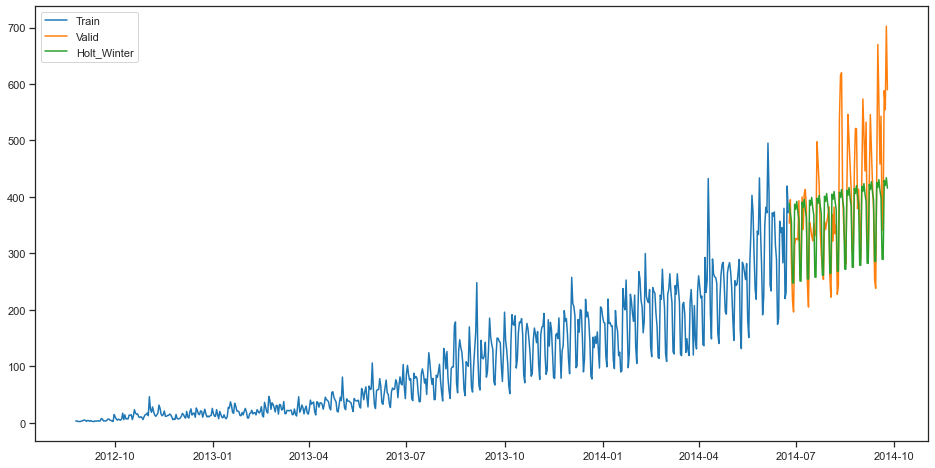

In [43]:

y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing (np.asarray (Train [ 'Count']), seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast (len(valid))

plt.figure(figsize=(16,8))
plt.plot( Train ['Count'], label='Train')
plt.plot(valid [ 'Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend (loc='best')
plt.show()

In [44]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

81.94569995693239


In [45]:
predict=fit1.forecast(len(test))

In [46]:
test['prediction']=predict

In [47]:
# Merge Test and test_original on day, month and year
merge=pd.merge (test, test_original, on=('day', 'month', 'year'), how='left')
merge['hour']=merge [ 'hour_y']
merge=merge.drop(['year', 'month', 'Datetime', 'hour_x', 'hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction ['prediction']*prediction['ratio']*24

# Let's drop all features other than ID and Count
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day', 'hour', 'ratio', 'prediction', 'ID_x',
'ID_y'], axis=1)
# Converting the final submission to csv format

pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt winters.csv')

- this method produced rmse of 328.356 on the leaderboard
- possible reason for this may be that this model was not that good in predicting the trend of the time series but worked really well on the seasonality part

# Introduction to ARIMA Model
- stands for Auto Regression Integrated Moving Average
- specified by three ordered parameters (p,d,q)
- p is the order of autoregressive model (no.of time lags)
- d is the degree of differencing (no. of times the data have had past values substracted)
- q is the order of the moving average model

What is a stationary time series?
There are three basic criterion for a series to be classified as stationary series:
- The mean of the time series should not be a function of time. It should be constant.
- The variance of the time series should not be a function of time.
- THe covariance of the ith term and the (i+m)th term should not be a function of time.

Why do we have to make the time series stationary?
We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be independent in one way. So, we will get more information when they are independent. Hence the time series must be stationary.
If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to remove the trend and seasonality from the data. To learn more about stationarity you can refer this article: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

## Parameter Tuning for ARIMA Model

### Stationary Check
- using Dicket Fuller test to check the stationarity of the series
- the intuition behind this test is that it determines how strongly a time series is defined by a trend
- the null hypothesis of the test is that time series is not stationary (has some time-dependent structure)
- the alternative hypothesis (rejecting the null hypothesis) is that the time series is stationary


The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the 'Test Statistic' is less than the 'Critical Value', 
we can reject the null hypothesis and say that the series is stationary.

We interpret this result using the Test Statistics and critical value. If the Test Statistics is smaller than critical value, it suggests we reject the null hypothesis (stationary), otherwise a greater Test Statistics suggests we accept the null hypothesis (non-stationary).

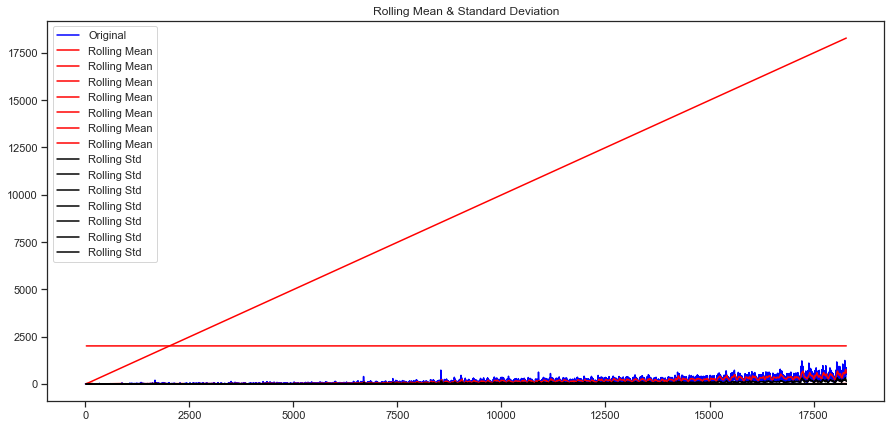

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p- value                           0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [48]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity (timeseries):

        #Determing rolling statistics
    rolmean = train_original.rolling (24).mean() # 24 hours on each day
    rolstd = train_original.rolling (24).std()

        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend (loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller (timeseries, autolag='AIC')
    dfoutput = pd.Series (dftest [0:4], index=['Test Statistic', 'p- value', '#Lags Used', 'Number of Observations Used'])

    
    for key, value in dftest [4].items():
        dfoutput['Critical Value (%s) '%key] = value
    print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,7
test_stationarity (train_original ['Count'])

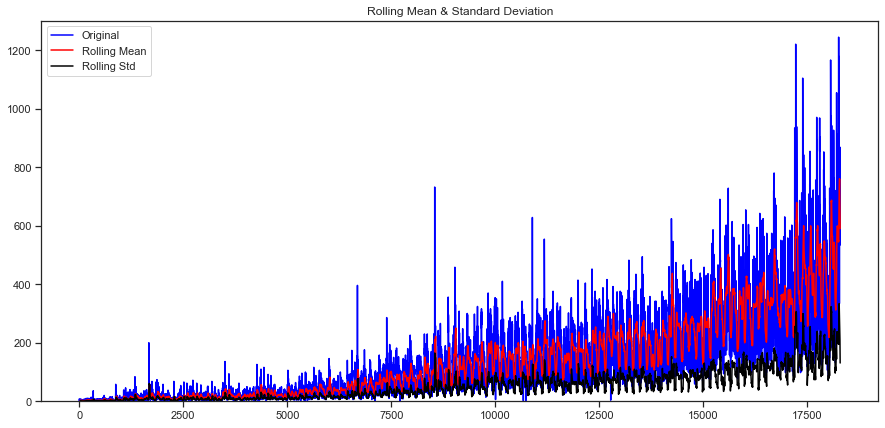

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [49]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd

def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(24).mean()  # 24 hours on each day
    rolstd = timeseries.rolling(24).std()

    # Plot rolling statistics:
    plt.figure(figsize=(15, 7))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.ylim(0, 1300)  # Cap the y-axis at 1200
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 7

# Assuming train_original is already defined and has a 'Count' column
test_stationarity(train_original['Count'])


- the statistics shows that the time series is stationary as Test Statistics < Critical Value but we can see an increasing trned in the data.
- So,firstly we will try to make the data more stationary by removing the trend and seasonality from the data

### Removing Trend
- a trend exists when there is a long term increase or decrease in the data. Doesnt have to be linear
- we see an increasing trend in the data so we can apply transformation which penalizes higher values more thans smaller ones (i.e log transform)
- will take rolling avg mean here to remove the trend. will take the window of 24 based on the fact that each day has 24 hrs

In [50]:

# Train_log=np.log(Train['Count'])
# valid_log = np.log(valid ['Count'])

# moving_avg = pd.rolling_mean(Train_log, 24)
# plt.plot(Train_log)
# plt.plot(moving_avg, color = 'red')
# plt.show()

# The rolling_mean function has been deprecated in newer versions of pandas. Instead, you should use the rolling method followed by the mean method

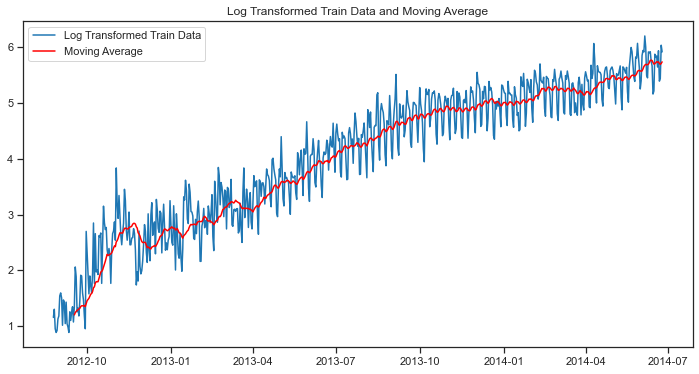

In [51]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = Train_log.rolling(window=24).mean()

plt.figure(figsize=(12, 6))
plt.plot(Train_log, label='Log Transformed Train Data')
plt.plot(moving_avg, color='red', label='Moving Average')
plt.legend(loc='best')
plt.title('Log Transformed Train Data and Moving Average')
plt.show()


In [52]:
train_log_moving_avg_diff = Train_log - moving_avg
train_log_moving_avg_diff

Datetime
2012-08-25         NaN
2012-08-26         NaN
2012-08-27         NaN
2012-08-28         NaN
2012-08-29         NaN
                ...   
2014-06-20    0.200295
2014-06-21   -0.317381
2014-06-22   -0.253342
2014-06-23    0.326990
2014-06-24    0.179745
Freq: D, Name: Count, Length: 669, dtype: float64

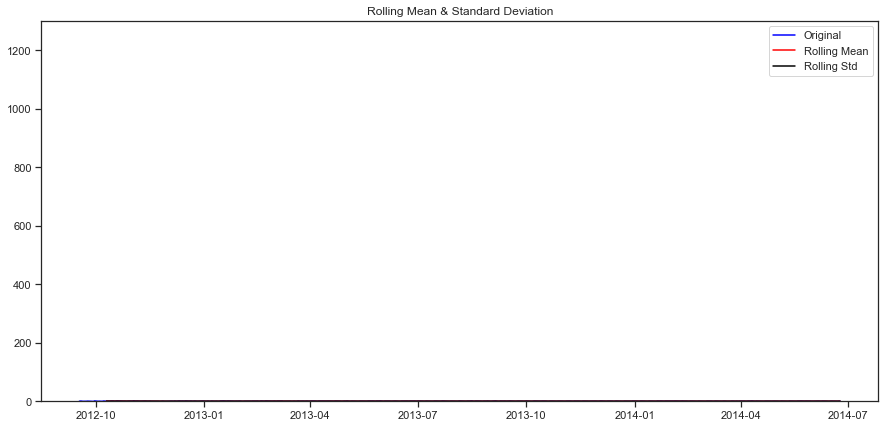

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [53]:
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)

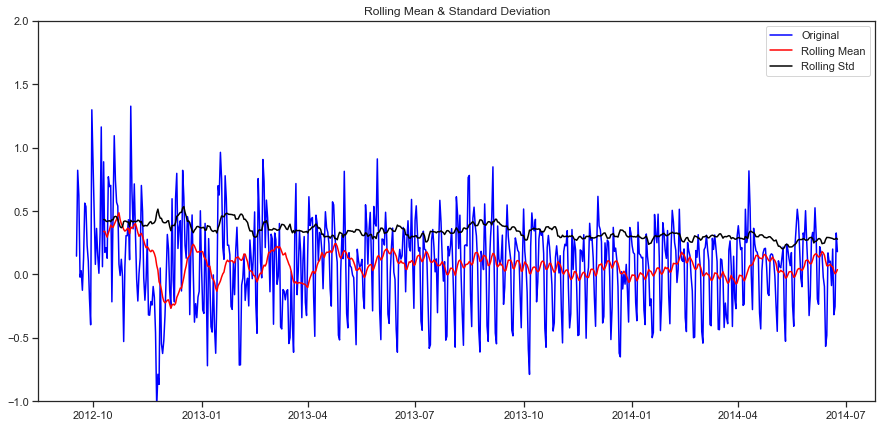

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [54]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd

def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(24).mean()  # 24 hours on each day
    rolstd = timeseries.rolling(24).std()

    # Plot rolling statistics:
    plt.figure(figsize=(15, 7))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.ylim(-1, 2)  # Set y-axis limit from -1 to 2
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 7

# Assuming train_log_moving_avg_diff is already defined and preprocessed
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)


from the results of Dickey-Fuller test above, we can conclude:
- Test Statistics score is very smaller compared to the Critical Value
- so we can confirm the trend have been removed

- now we move forward to stabilize the mean of the time series which is also a requirement for a stationary time series


***differencing can help to make the series stable and eliminate the trend***

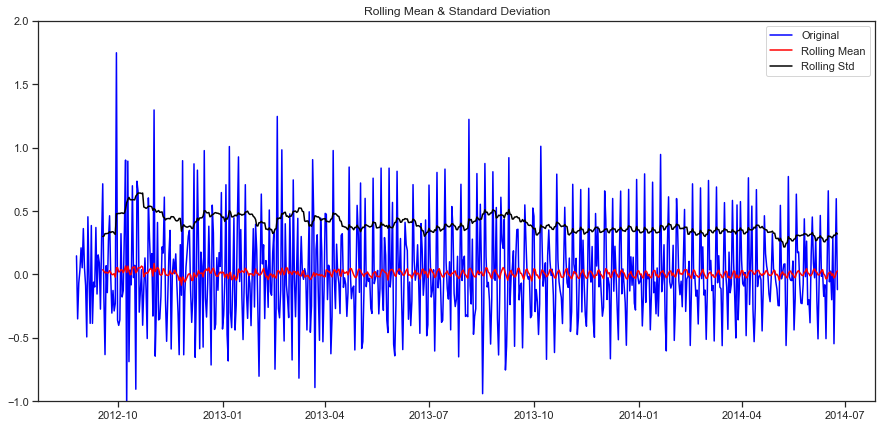

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [55]:
train_log_diff = Train_log -Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

now we will move the time series into trend and seasonality and will get the residual which is the random variation in the series

### Removing Seasonality
- by seasonality we mean periodic  fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (i.e quarter of the year, the month, or day of the week)
- Seasonality is always of fixed and known period
- Will use seasonal decompose to decompose the time series into trend, seasonality and residuals

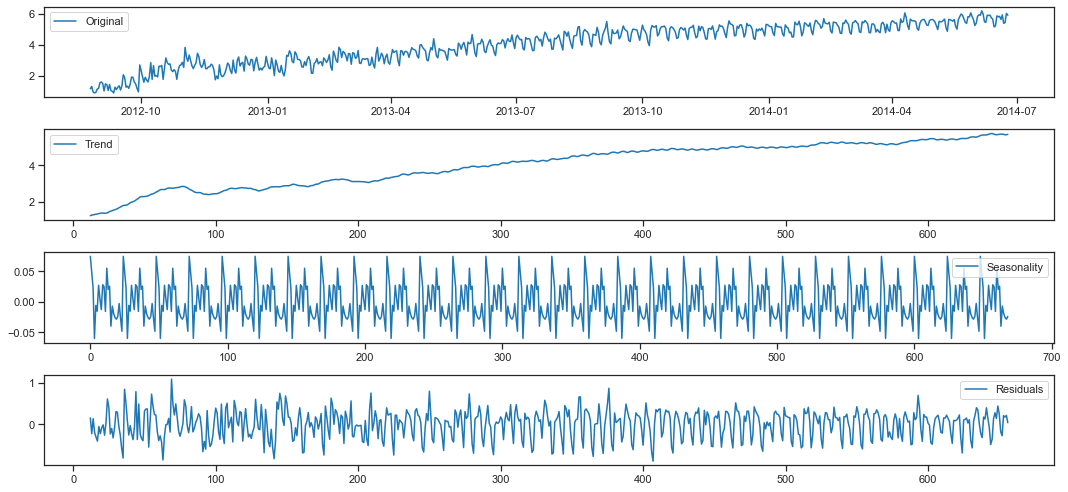

In [56]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log). Count.values, period=24) # cant no longer use freq = 24

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend (loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend (loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend (loc='best')
plt.tight_layout()
plt.show()

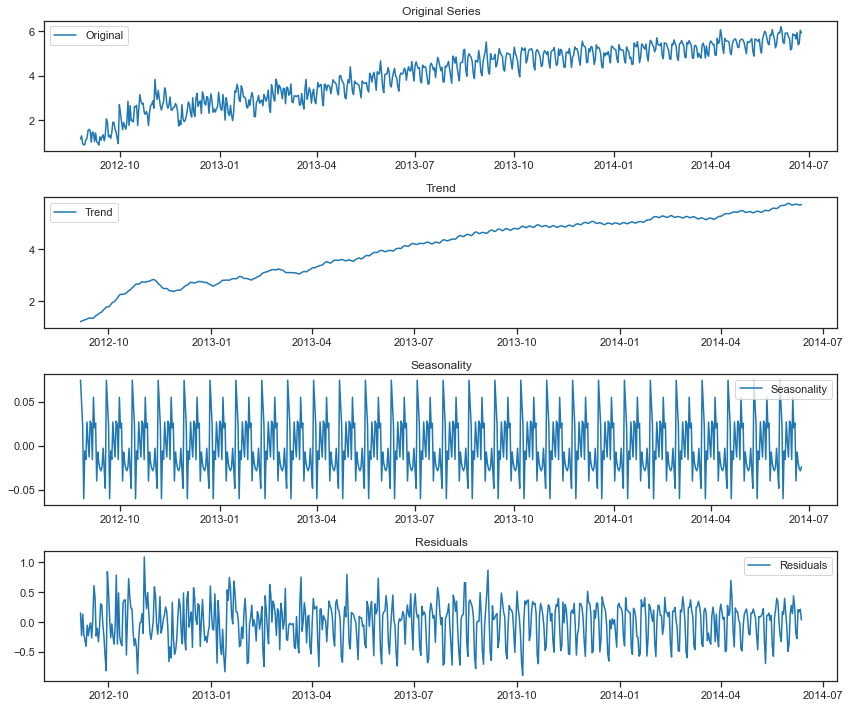

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
decomposition = seasonal_decompose(Train_log, period=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.title('Original Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()


- seasonality shows a constand trend in counter

In [59]:
# Let's check stationarity of residuals.

train_log_decompose = pd.DataFrame(residual)
train_log_decompose ['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)

test_stationarity(train_log_decompose[0])

KeyError: 0

- it can be interpreted from the results that the residuals are stationary

### Forecasting the time series using ARIMA
- first, we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters
- to do that, we need to use ACF (autocorrelation Function) and PACF(Partial Autocorrelation Function) graph
- ACF is the measure of correlation between the TimeSeries with a lagged version of itself
- PACF measures the correlation between the TimeSeries with a lagged version of itself but after elimination the variations already explained by the intervening comparisons

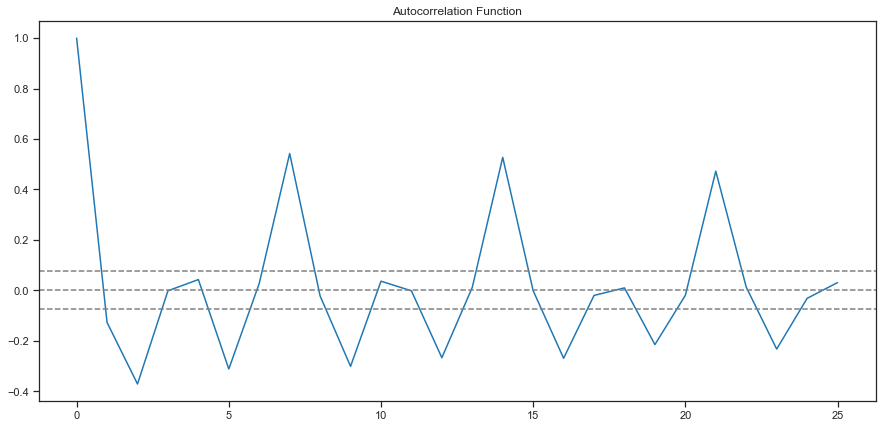

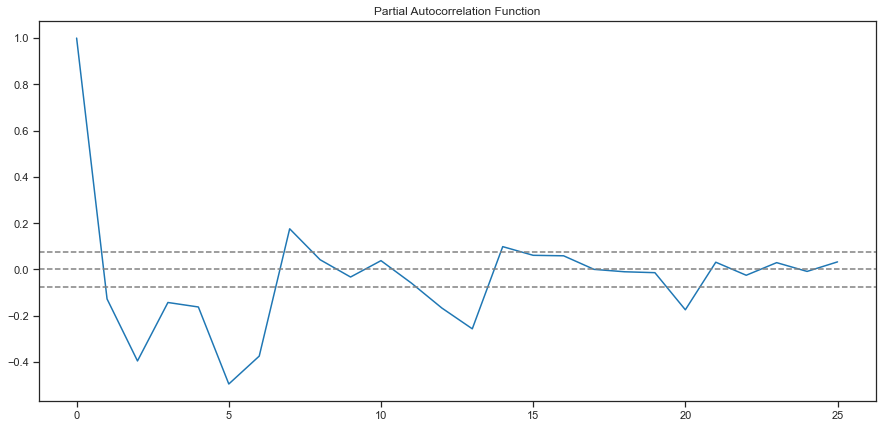

In [60]:

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

# ACF plot
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--', color='gray')
plt.axhline (y=1.96/np.sqrt(len(train_log_diff.dropna ())), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.show()

# PACF plot
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle= '--', color='gray')
plt.axhline (y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

- p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=2.
- q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=2.
- Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

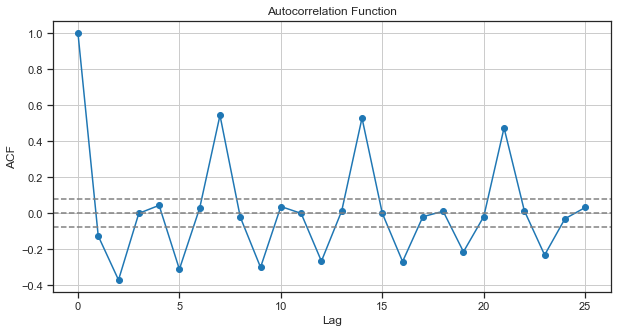

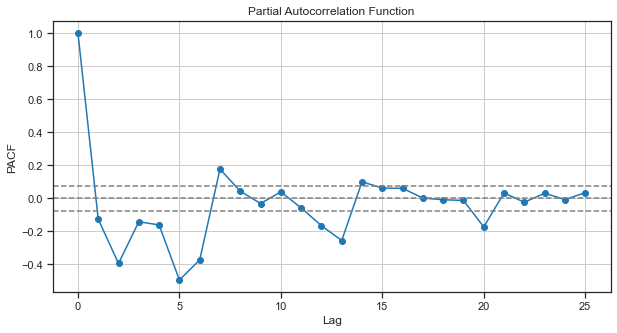

In [61]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import matplotlib.pyplot as plt

# Calculate ACF and PACF
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

# ACF plot
plt.figure(figsize=(10, 5))
plt.plot(lag_acf, marker='o')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# PACF plot
plt.figure(figsize=(10, 5))
plt.plot(lag_pacf, marker='o')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray') #1.96 is the 95% prediction interval.
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()


### AR Model
- the autoregressive model specifies that the output variable depends linearly on its own previous values

In [62]:
# from statsmodels.tsa.arima.model import ARIMA

# model = ARIMA (Train_log, order=(2, 1, 0)) # here the q value is zero since it is just the AR model
# results_AR = model.fit(disp=-1)

# plt.plot(train_log_diff.dropna (), label='original')
# plt.plot(results_AR. fittedvalues, color='red', label='predictions')
# plt.legend (loc='best')
# plt.show()

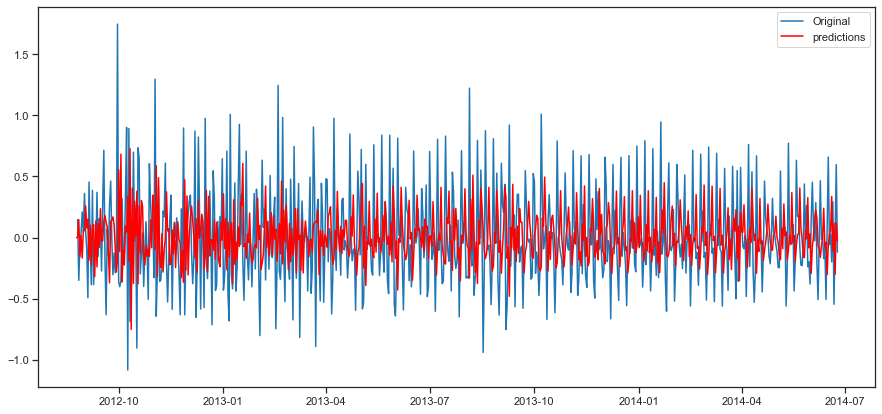

In [67]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_log_diff,order=(2,1,0)) # ARIMA(p, d, q) with p=2, d=1, q=0, q=0 because its just an AR model
result_AR=model.fit()
plt.plot(train_log_diff.dropna(),label='Original')
plt.plot(result_AR.fittedvalues,color='red',label='predictions')
plt.legend(loc='best')
plt.show()

In [68]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA

# # Fit the ARIMA model
# model = ARIMA(Train_log, order=(2, 1, 0))  # ARIMA(p, d, q) with p=2, d=1, q=0
# results_AR = model.fit()

# # Plot the original data and the fitted values
# plt.figure(figsize=(12, 6))
# plt.plot(train_log_diff.dropna(), label='Original')
# plt.plot(results_AR.fittedvalues, color='red', label='Fitted Values')
# plt.legend(loc='best')
# plt.title('AR Model - Original vs Fitted Values')
# plt.show()


In [69]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA

# # Fit the ARIMA model
# model = ARIMA(Train_log, order=(2, 1, 0))  # ARIMA(p, d, q) with p=2, d=1, q=0
# results_AR = model.fit()

# # Plot the original data and the fitted values
# plt.figure(figsize=(12, 6))
# plt.plot(train_log_diff.dropna(), label='Original')
# plt.plot(results_AR.fittedvalues, color='red', label='Fitted Values')
# plt.legend(loc='best')
# plt.title('AR Model - Original vs Fitted Values')
# plt.show()


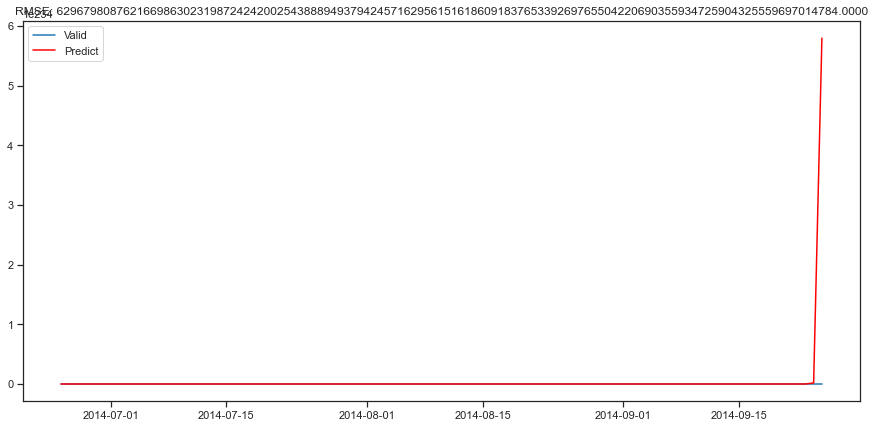

In [71]:

AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series (np.ones (valid.shape[0])* np.log(valid ['Count'])[0],index = valid.index)
AR_predict1=AR_predict1.add(AR_predict, fill_value=0)
AR_predict = np.exp(AR_predict1)

plt.plot(valid['Count'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend (loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot (AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

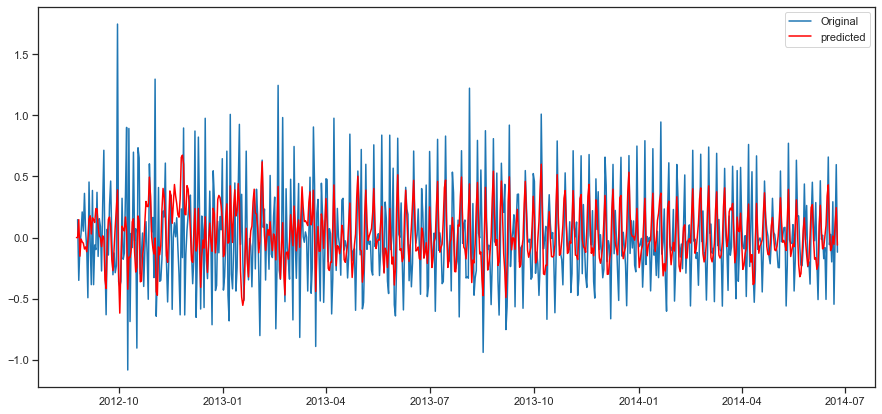

In [76]:

# model = ARIMA (Train_log, order=(2, 1, 2))
# results_ARIMA = model.fit()

# plt.plot(train_log_diff.dropna (), label='original')
# plt.plot(results_ARIMA. fittedvalues, color='red', label='predicted')
# plt.legend (loc='best')
# plt.show()

from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(train_log_diff,order=(2,1,2)) # ARIMA(p, d, q) with p=2, d=1, q=0, q=0 because its just an AR model
result_ARIMA=model.fit()
plt.plot(train_log_diff.dropna(),label='Original')
plt.plot(result_ARIMA.fittedvalues,color='red',label='predicted')
plt.legend(loc='best')
plt.show()

In [79]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series (np.ones(given_set.shape[0]) * 
np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff, fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend (loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot (predict, given_set['Count']))/given_set.shape[0]))
    plt.show()


def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend (loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

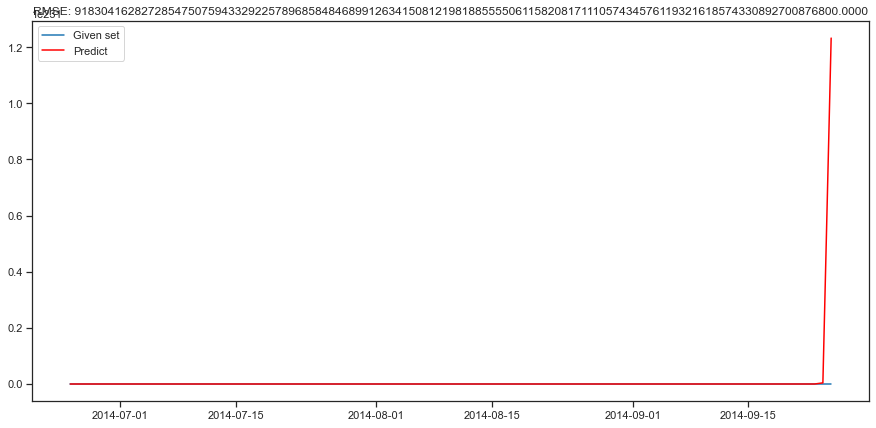

In [80]:
# Let's predict the values for validation set.
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, valid)

### SARIMAX model on daily time series
- takes into account the seasonality of the time series

c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


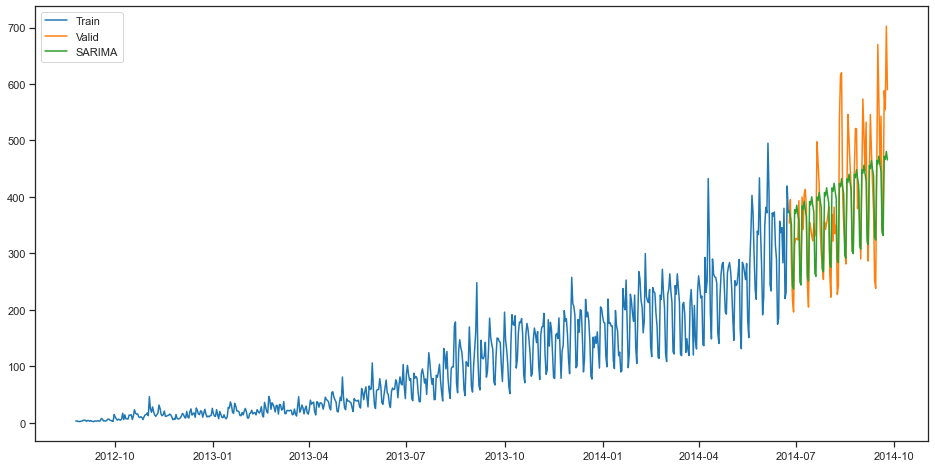

In [81]:
import statsmodels.api as sm

y_hat_avg = valid.copy()
fit1=sm.tsa.statespace.SARIMAX (Train.Count, order=(2,1,4), seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)

plt.figure(figsize=(16,8))
plt.plot( Train ['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg [ 'SARIMA'], label='SARIMA')
plt.legend (loc='best')
plt.show()


- Order in the above model represents the order of the AR model(number of time lags), the degree of differencing(number of times the data have had past values subtracted) and the order of MA model.
- Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.
- In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

In [82]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

69.93431368728045


In [83]:
predict=fit1.predict(starts="2014-9-26", ends="2015-4-26",dynamic=True)

In [86]:
test['prediction']=predict

# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day', 'month', 'year'), how='left')
merge['hour']=merge ['hour_y']
merge=merge.drop(['year', 'month', 'Datetime', 'hour_x', 'hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [88]:
prediction['ID']=prediction ['ID_y']
submission=prediction.drop(['day', 'hour','ratio', 'prediction', 'ID_x','ID_y'], axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('SARIMAX.csv')

In [89]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'Count' in test_original is the actual values and 'prediction' in test is the predicted values

# Merge Test and test_original on day, month, and year
merge = pd.merge(test, test_original, on=('day', 'month', 'year'), how='left')
merge['hour'] = merge['hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'hour_x', 'hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on='hour', how='left')

# Converting the ratio to the original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24

prediction['ID'] = prediction['ID_y']
submission = prediction.drop(['day', 'hour', 'ratio', 'prediction', 'ID_x', 'ID_y'], axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('SARIMAX.csv')

# Calculate RMSE
actual = test_original['Count']
predicted = prediction['Count']

# Ensure the lengths of actual and predicted match
if len(actual) == len(predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    print(f'The RMSE score is: {rmse}')
else:
    print('Error: The lengths of actual and predicted values do not match.')


KeyError: 'Count'

In [90]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming the DataFrames test, test_original, and temp2 are defined

# Add a check for the 'Count' column in test_original
if 'Count' not in test_original.columns:
    raise KeyError("The column 'Count' is not found in 'test_original' DataFrame. Please check the DataFrame.")

# Add the prediction to the test DataFrame
test['prediction'] = predict

# Merge test and test_original on 'day', 'month', and 'year'
merge = pd.merge(test, test_original, on=['day', 'month', 'year'], how='left')
merge['hour'] = merge['hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'hour_x', 'hour_y'], axis=1)

# Predict by merging merge and temp2
prediction = pd.merge(merge, temp2, on='hour', how='left')

# Converting the ratio to the original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24

prediction['ID'] = prediction['ID_y']
submission = prediction.drop(['day', 'hour', 'ratio', 'prediction', 'ID_x', 'ID_y'], axis=1)

# Convert the final submission to CSV format
submission.to_csv('SARIMAX.csv', columns=['ID', 'Count'], index=False)

# Calculate RMSE
actual = merge['Count']  # Actual counts from the merged DataFrame
predicted = prediction['Count']  # Predicted counts

# Ensure the lengths of actual and predicted match
if len(actual) == len(predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    print(f'The RMSE score is: {rmse}')
else:
    print('Error: The lengths of actual and predicted values do not match.')


KeyError: "The column 'Count' is not found in 'test_original' DataFrame. Please check the DataFrame."